<a href="https://colab.research.google.com/github/Gadgeteering/Lego-Machine-Learning-Dataset/blob/master/Copy_of_External_data_Local_Files%2C_Drive%2C_Sheets%2C_and_Cloud_Storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dropout, Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

import random
import glob
import os
import pathlib
import time
import matplotlib.pyplot as plt
from datetime import datetime
from packaging import version
import IPython.display as display

from google.colab import drive
drive.mount('/content/drive')


!pip install -q tf-nightly-2.0-preview

# Load the TensorBoard notebook extension
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/ 

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)
    
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

# Function to load and preprocess each image

def _parse_fn(filename, label):
    img = tf.io.read_file(filename)
    img = tf.image.decode_png(img,3)
    img = (tf.cast(img, tf.float32)/127.5) - 1
    img = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    return img, label



def load_and_preprocess_image(path):
  labels=path.split('/')
  label=labels[8]
  return label

##train_path = '/Users/petesmac/Documents/Machine Learning/DATA/LEGO brick images/train'
##valid_path = '/Users/petesmac/Documents/Machine Learning/DATA/LEGO brick images/valid'

train_path = '/content/drive/My Drive/DATA/LEGO brick images/train'
valid_path = '/content/drive/My Drive/DATA/LEGO brick images/valid'
data_root = pathlib.Path(train_path)


label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print (label_names)

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=label_names, batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=label_names, batch_size=32)
##test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['beer', 'wings'], batch_size=32)

vgg16_model = tensorflow.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))


# Start TensorBoard.
%tensorboard --logdir /content/drive/My Drive/logs/image

# Define the Keras TensorBoard callback.
logdir="/content/drive/My Drive/logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg16_model)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_batches,
      steps_per_epoch=train_batches.samples/train_batches.batch_size ,
      epochs=5,
      validation_data=valid_batches,
      validation_steps=valid_batches.samples/valid_batches.batch_size,
      verbose=1)

%tensorboard --logdir logs/gradient_tape


saved_model_path = "/content/drive/My Drive/tmp/saved_models/"+str(int(time.time()))
keras.experimental.export_saved_model(model, saved_model_path)
#tf.saved_model.save(vgg16_model, saved_model_path)
#model.save('Lego.h5')
#test_images = "LEGO brick images/test/test.jpeg"
#predictions = model.predict(test_images)
#predictions = model.predict(test_images)

#writer =tf.summary.FileWriter("/tmp/logs")
#writer.add_graph(sess.graph)


ERROR: tf-nightly-2-0-preview 2.0.0.dev20190713 has requirement tb-nightly<1.16.0a0,>=1.15.0a0, but you'll have tb-nightly 1.14.0a20190603 which is incompatible.
2.0.0-beta1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ERROR: tensorflow-gpu 2.0.0b1 has requirement tb-nightly<1.14.0a20190604,>=1.14.0a20190603, but you'll have tb-nightly 1.15.0a20190713 which is incompatible.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
['11214 Bush 3M friction with Cross axle', '18651 Cross Axle 2M with Snap friction', '2357 Brick corner 1x2x2', '3003 Brick 2x2', '3004 Brick 1x2', '3005 Brick 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3024 Plate 1x1', '3040 Roof Tile 1x2x45deg', '3069 Flat Tile 1x2', '32123 half Bush', '3673 Peg 2M', '3713 Bush for Cross Axle', '3794 Plate 1X2 with 1 Knob', '6632 Technic Lever 3M']
Found 6379 images belonging to 16 classes.
Found 6399 images b

W0713 18:52:42.281055 140028060477312 util.py:244] Unresolved object in checkpoint: (root).optimizer
W0713 18:52:42.283148 140028060477312 util.py:244] Unresolved object in checkpoint: (root).optimizer.iter
W0713 18:52:42.286889 140028060477312 util.py:244] Unresolved object in checkpoint: (root).optimizer.decay
W0713 18:52:42.290935 140028060477312 util.py:244] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0713 18:52:42.293502 140028060477312 util.py:244] Unresolved object in checkpoint: (root).optimizer.momentum
W0713 18:52:42.295295 140028060477312 util.py:244] Unresolved object in checkpoint: (root).optimizer.rho
W0713 18:52:42.297238 140028060477312 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'rms' for (root).layer_with_weights-1.kernel
W0713 18:52:42.299403 140028060477312 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'rms' for (root).layer_with_weights-1.bias
W0713 18:52:42.301524 140028060477312 util.py:244]

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--host ADDR]
                   [--port PORT] [--purge_orphaned_data BOOL]
                   [--reload_interval SECONDS] [--db URI] [--db_import]
                   [--db_import_use_op] [--inspect] [--version_tb] [--tag TAG]
                   [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_task TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT] [--master_tpu_unsecure_channel ADDR]
tensorboard: error: unrecognized arguments: Drive/logs/image

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                16400     
Total params: 40,422,224
Trainable params: 40,422,224
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


W0713 18:52:56.711229 140028060477312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


 21/199 [==>...........................] - ETA: 30:36 - loss: 4.5706 - acc: 0.1458

This notebook provides recipes for loading and saving data from external sources.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['11214 Bush 3M friction with Cross axle', '18651 Cross Axle 2M with Snap friction', '2357 Brick corner 1x2x2', '3003 Brick 2x2', '3004 Brick 1x2', '3005 Brick 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3024 Plate 1x1', '3040 Roof Tile 1x2x45deg', '3069 Flat Tile 1x2', '32123 half Bush', '3673 Peg 2M', '3713 Bush for Cross Axle', '3794 Plate 1X2 with 1 Knob', '6632 Technic Lever 3M']
(224, 224, 3)
(1, 16)
10
10


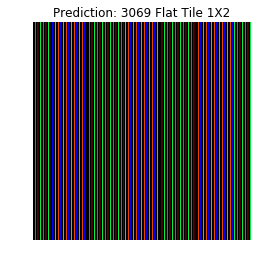

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
from tensorflow import keras

!pip install -q tensorflow_hub
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image
from google.colab import drive
import pathlib
drive.mount('/content/drive')
from tensorflow.keras import layers
train_path = '/content/drive/My Drive/DATA/LEGO brick images/train'
data_root = pathlib.Path(train_path)
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print (label_names)
saved_model_path = "/content/drive/My Drive/tmp/saved_models/1563018592/"
test_path = '/content/drive/My Drive/DATA/LEGO brick images/test/test20.jpg'
IMAGE_SHAPE = (224, 224)
classifier = keras.experimental.load_from_saved_model(saved_model_path)
img = Image.open(test_path).resize(IMAGE_SHAPE)

#print(img)

img = np.array(img)/255.0
print(img.shape)
result = classifier.predict(img[np.newaxis, ...])
print(result.shape)
#classifier.summary()
#print(classifier.predict(img).shape)
print(np.argmax(result[0]))
predicted_class = np.argmax(result[0], axis=-1)
print(predicted_class)
#print(list(predicted_class))
#labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
#imagenet_labels = np.array(open(labels_path).read().splitlines())
plt.imshow(img)
plt.axis('off')
predicted_class_name = label_names[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())


In [0]:
%tensorboard --logdir logs